# PBMC technical replicates comparisons

In [1]:
!date
!hostname

Tue Jul  9 11:39:10 PDT 2024
c4-dev1


In [2]:
%env CONDA_PREFIX

'/c4/home/derek/miniconda3/envs/scquint_4'

In [87]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

import scanpy as sc
import anndata

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read in files for gene expression

In [5]:
input_dir = '/nowakowskilab/data1/derek/data_scSLR/PBMC/'

In [6]:
adata = sc.read_h5ad(input_dir+'gene_expression_v2.h5ad')

In [8]:
input_dir_internal_1= '/c4/home/derek/data1/derek/data_scSLR/PBMC/STAR_outs/sample_1/StarOut_internal/Solo.out/GeneFull/raw/'

adata_internal_1 = sc.read_mtx(input_dir_internal_1 + 'matrix.mtx').T
adata_internal_1.obs_names = pd.read_csv(input_dir_internal_1+'barcodes.tsv',header=None)[0]
adata_internal_1.var_names = pd.read_csv(input_dir_internal_1+'features.tsv',header=None,sep='\t')[1]

In [9]:
input_dir_internal_2= '/c4/home/derek/data1/derek/data_scSLR/immune_fastqs/rerun_w_3prime/sample_1/merged/StarOut_internal/Solo.out/GeneFull/raw/'

adata_internal_2 = sc.read_mtx(input_dir_internal_2 + 'matrix.mtx').T
adata_internal_2.obs_names = pd.read_csv(input_dir_internal_2+'barcodes.tsv',header=None)[0]
adata_internal_2.var_names = pd.read_csv(input_dir_internal_2+'features.tsv',header=None,sep='\t')[1]

In [74]:
input_dir_5prime_1= '/c4/home/derek/data1/derek/data_scSLR/PBMC/STAR_outs/sample_1/StarOut_5prime/Solo.out/GeneFull/raw/'

adata_5prime_1 = sc.read_mtx(input_dir_5prime_1 + 'matrix.mtx').T
adata_5prime_1.obs_names = pd.read_csv(input_dir_5prime_1+'barcodes.tsv',header=None)[0]
adata_5prime_1.var_names = pd.read_csv(input_dir_5prime_1+'features.tsv',header=None,sep='\t')[1]

In [75]:
adata_internal_1.var_names_make_unique()
adata_5prime_1.var_names_make_unique()

In [18]:
adata.obs.batch

barcode_index
AAACCTGAGATATGCA-0    22
AAACCTGAGCTGATAA-0    22
AAACCTGAGGTCGGAT-0    22
AAACCTGAGTACGTTC-0    22
AAACCTGAGTCAAGCG-0    22
                      ..
TTTGTCAGTGTTGAGG-1    23
TTTGTCAGTTGGACCC-1    23
TTTGTCAGTTGTACAC-1    23
TTTGTCATCCGGGTGT-1    23
TTTGTCATCTACTATC-1    23
Name: batch, Length: 19087, dtype: category
Categories (2, object): ['22', '23']

In [25]:
cell_list = [i[:-2] for i in adata[adata.obs.batch == '22'].obs_names.tolist()]

In [30]:
adata_internal_1_ = adata_internal_1[adata_internal_1.obs_names.isin(cell_list)]

In [31]:
adata_internal_2_ = adata_internal_2[adata_internal_2.obs_names.isin(cell_list)]

In [76]:
adata_5prime_1_ = adata_5prime_1[adata_5prime_1.obs_names.isin(cell_list)]

In [39]:
adata_internal_2_.X.sum(axis=0)

matrix([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

[0.0,
 0.0,
 0.0,
 1.6812412373755872,
 1.041392685158225,
 0.0,
 1.9138138523837167,
 0.0,
 1.041392685158225,
 0.0,
 0.0,
 1.662757831681574,
 0.0,
 0.6989700043360189,
 2.558708570533166,
 0.9542425094393249,
 2.3783979009481375,
 0.0,
 0.8450980400142568,
 0.8450980400142568,
 0.0,
 0.0,
 0.0,
 2.661812685537261,
 1.4471580313422192,
 0.8450980400142568,
 0.0,
 0.47712125471966244,
 1.255272505103306,
 2.3502480183341627,
 0.0,
 0.9030899869919435,
 0.0,
 0.0,
 1.6434526764861874,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3010299956639812,
 1.7403626894942439,
 1.6232492903979006,
 2.977266212427293,
 1.2787536009528289,
 0.3010299956639812,
 0.0,
 2.6963563887333324,
 0.3010299956639812,
 0.6989700043360189,
 2.041392685158225,
 1.6532125137753437,
 2.846955325019824,
 0.0,
 1.6232492903979006,
 0.6020599913279624,
 1.4471580313422192,
 0.7781512503836436,
 2.606381365110605,
 2.8432327780980096,
 2.12057393120585,
 2.754348335711019,
 0.47712125471966244,
 0.3010299956639812,
 0.0,
 0.0,
 0.0,


<Axes: >

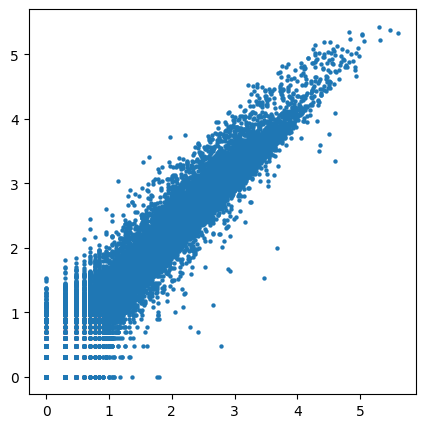

In [85]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

sns.scatterplot(x=[np.log10(i+1) for i in  adata_internal_1_.X.sum(axis=0).tolist()[0]],
                y= [np.log10(i+1) for i in  adata_5prime_1_.X.sum(axis=0).tolist()[0]],
                s=10,
                ax=ax,
                linewidth=0
               )

# ax.set_xlim(0,100000)
# ax.set_ylim(0,100000)

In [88]:
corr = stats.pearsonr(x=[np.log10(i+1) for i in  adata_internal_1_.X.sum(axis=0).tolist()[0]],
                      y=[np.log10(i+1) for i in  adata_5prime_1_.X.sum(axis=0).tolist()[0]]
                     )

In [89]:
corr

PearsonRResult(statistic=0.98002196227525, pvalue=0.0)